# Klasse für den K-Means-Algorithmus
## Quellen

https://github.com/gkabbe/Python-Kurs2015/wiki/5---Numpy
Berechnet den Massenmittelpunkt
https://mubaris.com/posts/kmeans-clustering/

In [15]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
class k_Means():
    """
        Erhaelt eine Punkt-Liste als Array
        die Anzahl der Clusterpunkte
        eventuell die Cluster-Liste, wenn nicht,
        werden die Cluster-Punkte zufaellig aus den
        Punkten der PL bestimmt
    """
    def __init__(self, punkte, anzahl, clLi=None):        
        #print(self.clLi)
        self.puLi = punkte
        self.anzahlCluster = anzahl
        self.laengePuLi, self.dimPunkte =self.puLi.shape
        if clLi:
            self.clLi=clLi
        else:
            self.bestimmeCL()
        print("StartCluster: \n", self.clLi)
        self.cluster= np.zeros((self.laengePuLi,),dtype=int)
        self.error=20
        self.cls=[]
        
    def bestimmeCL(self):
        #zufaellige Auswahl der Clusterpunkte aus den gegebenen
        self.clLi=np.zeros((self.anzahlCluster,self.dimPunkte))#,dtype=int)
        clListe=[]
        i=0
        while len(clListe) < self.anzahlCluster:
            index= random.randint(0,self.laengePuLi-1)
            cl=self.puLi[index]
            if not self.istEnthalten(clListe,cl): #vermeide Doppelte
                clListe.append(cl)
                self.clLi[i]=self.puLi[index]
                i+=1
                
    def istEnthalten(self,array,el):
        for e in array:
            if (e==el).all():
                return True
        return False
        
    def einteilRunde(self):        
        for i in range(self.laengePuLi):
            #print("Abstaende: ",self.clLi,self.puLi[i])
            abstand=np.linalg.norm(self.clLi-self.puLi[i],axis=1)
            #print(abstand)
            cluster = np.argmin(abstand)
            #print(cluster)
            self.cluster[i]=cluster        
        self.clLi_old=np.copy(self.clLi)
        self.cls.append(self.clLi_old)
        for i in range(self.anzahlCluster):            
            punkte= [self.puLi[j] for j in range(self.laengePuLi) if self.cluster[j]==i]                 
            self.clLi[i]=np.mean(punkte,axis =0)
        print("Neue Cluster: \n", self.clLi)
        self.error = np.linalg.norm(self.clLi-self.clLi_old)
        print(self.error)
        self.zeigen()
        
    def einteilen(self,bis=0):           
        self.einteilRunde()
        while self.error> bis:            
            self.einteilRunde()   
            
        self.gibZahlen()
            
    def gibZahlen(self):
        print("Verteilung der Punkte auf die Cluster")
        #liefert die Anzahlen der Punkte je Cluster
        for i in range(self.anzahlCluster):            
            punkte= [self.puLi[j] for j in range(self.laengePuLi) if self.cluster[j]==i]
            print(i,len(punkte))
        
    def zeigen(self):
        fig = plt.figure()
        fig.suptitle("Einteilung in Cluster")
        ax = fig.add_subplot(111)        
        farben=["red","yellow","blue","green","lightblue","grey"]*2
        m=["+","x","*","o","v"]*20
        for i in range(self.anzahlCluster):
            xs= [self.puLi[j][0] for j in range(self.laengePuLi) if self.cluster[j]==i]
            ys= [self.puLi[j][1] for j in range(self.laengePuLi) if self.cluster[j]==i]
            #print("xs: ",xs," ys: ",ys)            
            ax.scatter(xs,ys, c=farben[i])        
        si=-1#Markerzaehler
        for c in self.cls:            
            si+=1
            for i in range(self.anzahlCluster):
                if i==0:
                    ax.scatter(c[i][0],c[i][1], c="black",marker=m[si],label=si)   
                else:
                    ax.scatter(c[i][0],c[i][1], c="black",marker=m[si])#,label=si)   
            
        #for c in self.clLi:
            #ax.scatter(c[0],c[1], c="black",marker=m[0])
        maxis=np.amax(self.puLi,0)
        minis=np.amin(self.puLi,0)
        zusatz = (maxis - minis)//20 +1
        #print("Maxis ",maxis, " Minis: ",minis,"Zusatz:", zusatz)
        plt.axis([int(minis[0])-zusatz[0],int(maxis[0])+zusatz[0],
                  int(minis[1])-zusatz[1],int(maxis[1])+zusatz[1]])
        fig.legend(loc=2)
        plt.show()
        #fig.savefig("cluster.png", dpi=200)

Testdurchlauf mit den Daten aus dem [xclara.csv-Datenset](https://vincentarelbundock.github.io/Rdatasets/csv/cluster/xclara.csv). 

Die schwarzen Punkte im Graph markieren die "Wanderung" der Clusterzentren vom Zufallswert zu den echten Mittelpunkten.

Array der eingelesenen Datenpunkte:
 [[  2.072345  -3.241693]
 [ 17.93671   15.78481 ]
 [  1.083576   7.319176]
 ...
 [ 64.46532  -10.50136 ]
 [ 90.72282  -12.25584 ]
 [ 64.87976  -24.87731 ]]
StartCluster: 
 [[  6.733568  18.12497 ]
 [ 31.93696   62.87588 ]
 [ -2.972188   6.370999]
 [ 59.49207  -21.839   ]
 [ 65.88091  -24.6382  ]
 [  7.646434  29.92259 ]]
Neue Cluster: 
 [[ 13.7108379   12.57479169]
 [ 40.8085154   59.92874018]
 [  1.84628118   2.85389753]
 [ 61.21344926  -6.53224487]
 [ 76.80252126 -13.05238511]
 [ 13.25951628  28.93672404]]
26.93911233417182


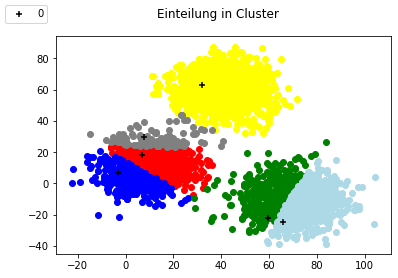

Neue Cluster: 
 [[ 15.47033556  10.54073566]
 [ 41.00199167  60.0984599 ]
 [  1.02379337   4.05068126]
 [ 61.66894611  -6.59095999]
 [ 77.01403165 -13.16311964]
 [ 12.42366256  28.16974053]]
3.311052719167663


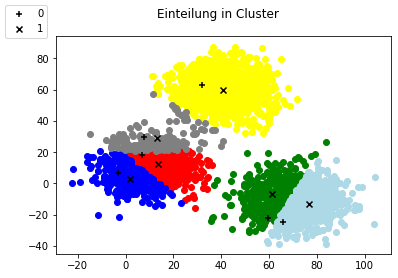

Neue Cluster: 
 [[ 16.82377377   9.24703278]
 [ 40.99507308  60.07961546]
 [  0.47449727   5.19127722]
 [ 62.03107572  -6.61485463]
 [ 77.1807522  -13.34178368]
 [ 11.47743087  27.14814185]]
2.6905378816021224


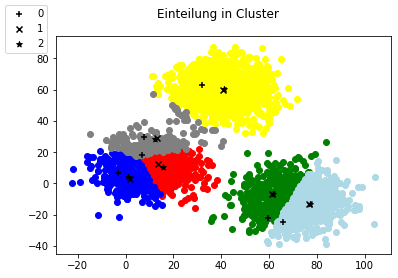

Neue Cluster: 
 [[ 17.63454437   8.38814974]
 [ 40.91863355  60.01843117]
 [  0.52908914   5.8162612 ]
 [ 62.2749688   -6.57821127]
 [ 77.32053351 -13.54399905]
 [ 10.94820848  25.83644946]]
1.9799168028301135


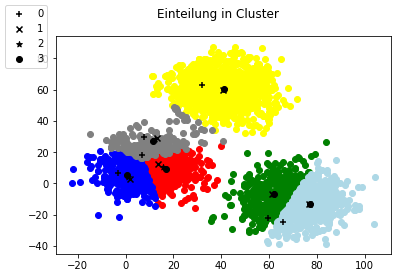

Neue Cluster: 
 [[ 18.02416642   7.63430685]
 [ 40.85158996  59.94611435]
 [  0.48071105   6.02778128]
 [ 62.515713    -6.4175919 ]
 [ 77.36384952 -13.83727807]
 [ 10.65238789  24.55333178]]
1.637814456234996


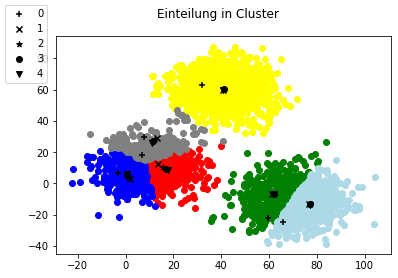

Neue Cluster: 
 [[ 18.18764812   7.08457179]
 [ 40.83466318  59.9343996 ]
 [  0.26009478   6.07464965]
 [ 62.6933438   -6.3236097 ]
 [ 77.40223338 -14.04545154]
 [ 10.45118077  23.76443954]]
1.0621944173627678


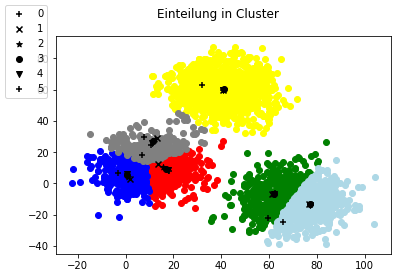

Neue Cluster: 
 [[ 18.47280739   6.66783786]
 [ 40.80433712  59.90617009]
 [  0.2216495    5.91168032]
 [ 62.81368258  -6.2359241 ]
 [ 77.40247095 -14.20424021]
 [ 10.34714558  22.89789315]]
1.0458712345220507


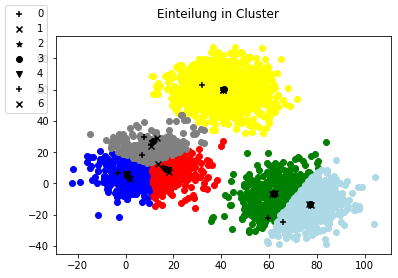

Neue Cluster: 
 [[ 18.62904416   6.36013377]
 [ 40.77370977  59.87767893]
 [  0.15635269   5.85497073]
 [ 62.85702445  -6.22688417]
 [ 77.41965723 -14.24832289]
 [ 10.29509257  22.31887242]]
0.6859260768890311


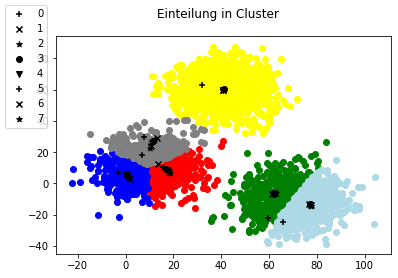

Neue Cluster: 
 [[ 1.87536937e+01  6.14723356e+00]
 [ 4.07737098e+01  5.98776789e+01]
 [ 7.19055044e-02  5.79832830e+00]
 [ 6.29708217e+01 -6.15909034e+00]
 [ 7.74240998e+01 -1.43915017e+01]
 [ 1.02487362e+01  2.19838556e+01]]
0.47292134545839437


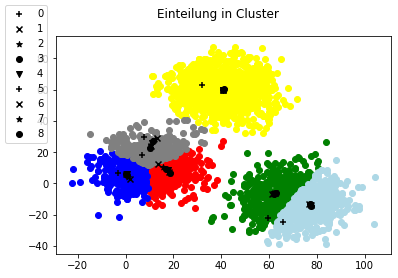

Neue Cluster: 
 [[ 1.88605638e+01  5.96715010e+00]
 [ 4.07737098e+01  5.98776789e+01]
 [ 6.99910667e-02  5.72690573e+00]
 [ 6.31148036e+01 -6.13852277e+00]
 [ 7.74884856e+01 -1.45421253e+01]
 [ 1.02735973e+01  2.17556664e+01]]
0.3868221107864485


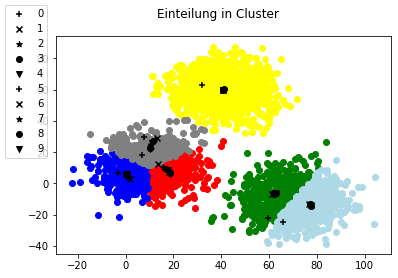

Neue Cluster: 
 [[ 18.91121601   5.79399884]
 [ 40.77370977  59.87767893]
 [  0.1179095    5.72651385]
 [ 63.24363438  -6.11168928]
 [ 77.53550784 -14.68600438]
 [ 10.3808559   21.66448588]]
0.3080443075092457


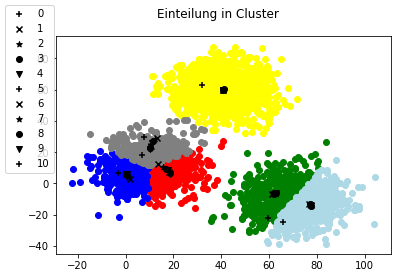

Neue Cluster: 
 [[ 18.91606928   5.72715163]
 [ 40.77370977  59.87767893]
 [  0.1179095    5.72651385]
 [ 63.42989856  -6.01720762]
 [ 77.54533279 -14.93391256]
 [ 10.4336238   21.62432591]]
0.3377358471632917


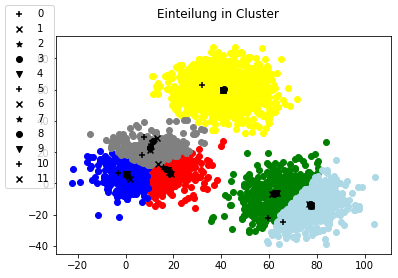

Neue Cluster: 
 [[ 18.93890951   5.66980391]
 [ 40.77370977  59.87767893]
 [  0.1179095    5.72651385]
 [ 63.52137277  -5.92918272]
 [ 77.50182401 -15.07899113]
 [ 10.46794267  21.57440386]]
0.2157247110306624


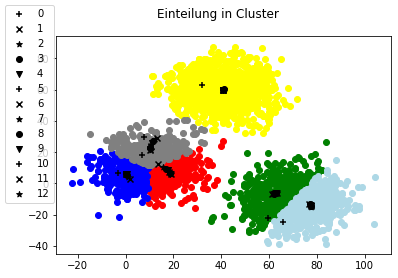

Neue Cluster: 
 [[ 18.94591842   5.6386374 ]
 [ 40.77370977  59.87767893]
 [  0.1179095    5.72651385]
 [ 63.59479556  -5.87485858]
 [ 77.47861641 -15.18599463]
 [ 10.48938196  21.55185656]]
0.14939498613810728


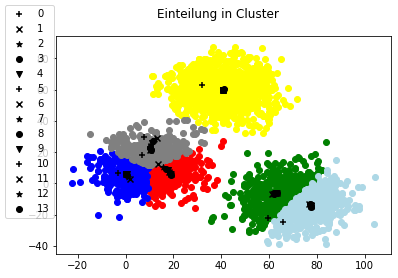

Neue Cluster: 
 [[ 18.94591842   5.6386374 ]
 [ 40.77370977  59.87767893]
 [  0.1179095    5.72651385]
 [ 63.64247569  -5.86106381]
 [ 77.4855006  -15.24570657]
 [ 10.48938196  21.55185656]]
0.07795253695228134


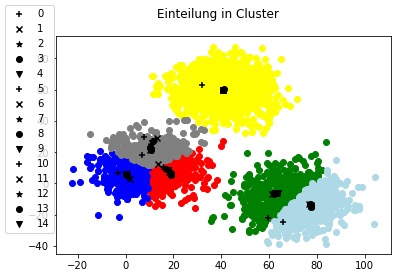

Neue Cluster: 
 [[ 18.94591842   5.6386374 ]
 [ 40.77370977  59.87767893]
 [  0.1179095    5.72651385]
 [ 63.64247569  -5.86106381]
 [ 77.4855006  -15.24570657]
 [ 10.48938196  21.55185656]]
0.0


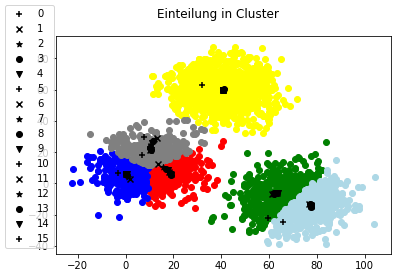

Verteilung der Punkte auf die Cluster
0 294
1 1141
2 314
3 520
4 432
5 299


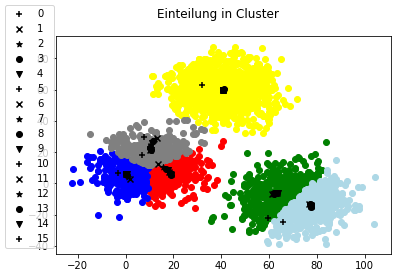

In [23]:
def csv2array(datei):
    # liest eine csv-Datei ein und liefert ein PunktArray
    arr=np.loadtxt(datei,delimiter=",",
                   skiprows=1,
                   usecols=(1,2))
    #erste Zeile ueberspringen und nur die Spalten 1 und 2 verwenden
    return arr                    

punktliste= [[2,12],[3,11],[3,8],[5,4],[7,5],[7,3],[10,8],[13,8]]
puAr=np.array(punktliste,dtype=int)    
puAr=csv2array("xclara.csv")
print("Array der eingelesenen Datenpunkte:\n",puAr)
k=k_Means(puAr,6)
k.einteilen()
k.zeigen()


Beispiel mit dem Iris-Datenset, bei dem sich die 3 Arten nicht klar trennen lassen. Abhängig von den Startwerten lässt sich aber zumindest eine Art abtrennen.

StartCluster: 
 [[5.4 1.5]
 [6.1 4.7]
 [5.  1.6]]
Neue Cluster: 
 [[5.43571429 1.47857143]
 [6.30103093 4.95876289]
 [4.85128205 1.59230769]]
0.36232935179581793


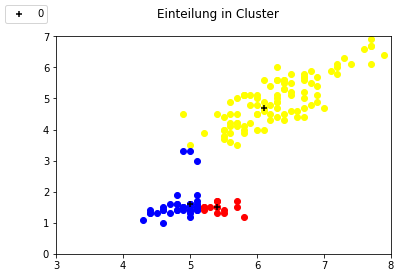

Neue Cluster: 
 [[5.43571429 1.47857143]
 [6.31458333 4.97395833]
 [4.855      1.64      ]]
0.051989889901452715


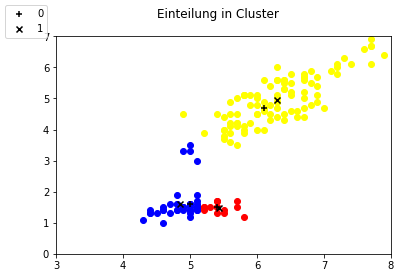

Neue Cluster: 
 [[5.43571429 1.47857143]
 [6.31458333 4.97395833]
 [4.855      1.64      ]]
0.0


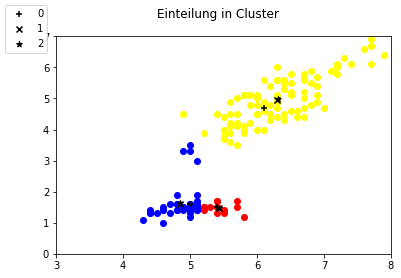

Verteilung der Punkte auf die Cluster
0 14
1 96
2 40


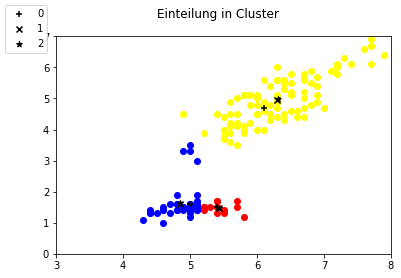

In [19]:
def csv2array(datei):
    # liest eine csv-Datei ein und liefert ein PunktArray
    arr=np.loadtxt(datei,delimiter=";",
                   skiprows=1,
                   usecols=(0,2))#,2,3))
    #erste Zeile ueberspringen und nur die Spalten 0 bis 3 verwenden
    return arr                    
  
puAr=csv2array("iris.csv")
#print("Array der eingelesenen Datenpunkte:\n",puAr)
k=k_Means(puAr,3)
k.einteilen()
k.zeigen()